In [1]:

import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import pandas as pd
import io
import seaborn as sns

In [2]:
import requests
url = "https://github.com/CSSEGISandData/COVID-19/raw/master/csse_covid_19_data/csse_covid_19_time_series/time_series_19-covid-Confirmed.csv"
raw_data=requests.get(url).content


In [3]:


corona_data = pd.read_csv(io.StringIO(raw_data.decode('utf-8')))
#print(corona_data.columns)
corona_data.head(10)
first_data_col = corona_data.columns.to_list().index("1/22/20")
print(f"1st data column : {first_data_col}")
assert first_data_col>2

1st data column : 4


In [18]:
countries = corona_data['Country/Region']
provinces = corona_data['Province/State']
curr_cases = corona_data[corona_data.columns[-1]]
limit = 5000

geos = { c+("/"+str(p) if p is not np.nan else "") :(i,c,(str(p) if p is not np.nan else ""),s) for c,p,s,i in zip(countries,provinces,curr_cases,range(len(countries))) } ##if s>=limit}
print(f"Total {len(geos)} geo locations with current caeses count > {limit}") 
#print(list(k+str(v) for k,v in geos.items()[:10]))

us_rows = []
for k,v in geos.items():
    if k.startswith("US"):
        us_rows.append(v[0])

print("Number of Us locations:: ",len(us_rows))        
        


Total 482 geo locations with current caeses count > 5000
Us rows:  [98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 209, 210, 211, 212, 213, 214, 215, 216, 217, 218, 219, 220, 221, 222, 223, 224, 225, 226, 227, 228, 229, 230, 231, 232, 233, 234, 235, 236, 237, 238, 239, 240, 241, 242, 243, 244, 245, 246, 247, 248, 249, 250, 251, 252, 253, 254, 255, 256, 257, 258, 259, 260, 261, 262, 263, 264, 265, 266, 267, 268, 269, 270, 271, 272, 273, 274, 275, 276, 277, 278, 279, 280, 281, 282, 283, 284, 285, 286, 287, 288, 289, 290, 291, 292, 293, 294, 295, 296, 297, 298, 299, 300, 301, 302, 303, 304, 305, 306, 307, 308, 309, 310, 311, 312, 313, 314, 315, 316, 317, 318, 319, 320, 321, 322, 323, 324, 325, 326, 327, 328, 329, 330, 331, 332, 333, 334, 335, 336, 337, 338, 339, 340, 341, 342, 343,

In [22]:
 def get_series(i):
        fr =  corona_data.iloc[i,first_data_col:]
        return np.array([f for f in fr if f>100 ])
    
def get_series_US():
        us_series = corona_data.iloc[us_rows[0],first_data_col:]
        for i in us_rows[1:]:
            us_series =  np.add(us_series,corona_data.iloc[i,first_data_col:])
        
        return np.array([f for f in us_series if f>100 ])    
    

dict_keys(['Germany', 'Italy', 'Spain', 'Switzerland', 'US/New York', 'Iran', 'France/France', 'United Kingdom/United Kingdom'])
Max days 28


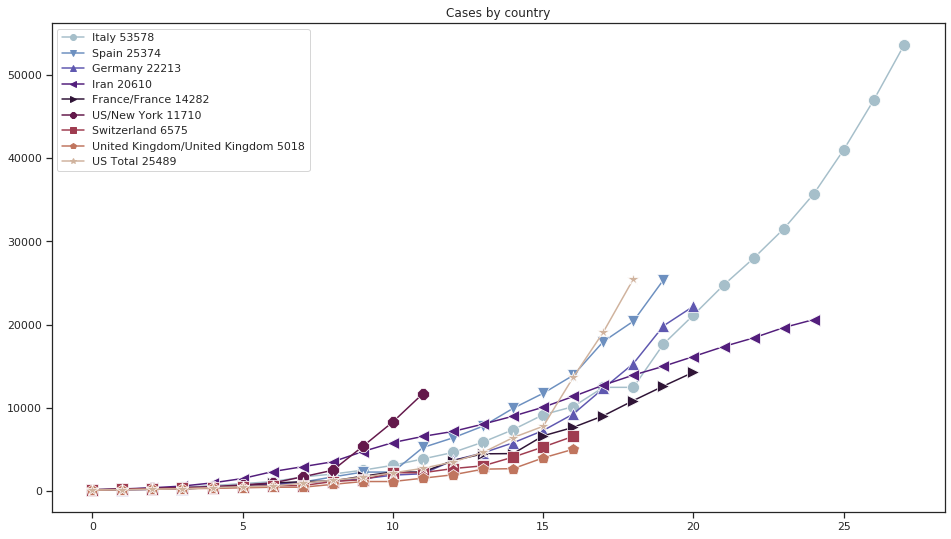

In [25]:
from functools import reduce
skip_china = True
skip_korea = True
series = { c : get_series(geos[c][0]) for c,v in geos.items() if v[3]>limit and (not skip_china or not c.startswith("China")) and (not skip_korea or not c.startswith("Korea")) }

print(series.keys())
max_days = reduce(max,map(len,series.values()))
print (f"Max days {max_days}")
sns.set(style="ticks")

data = pd.DataFrame ()

sorted_keys = list(series.keys())
sorted_keys.sort(key = lambda a: -series[a][-1])

for c in sorted_keys:
    data = pd.concat([data,pd.DataFrame ({f"{c} {series[c][-1]}":get_series(geos[c][0])})],axis=1)

us_series = get_series_US()
data = pd.concat([data,pd.DataFrame ({f"US Total {us_series[-1]}":us_series})],axis=1)
    
    
plt.figure(figsize=(16, 9))
plt.title("Cases by country")
filled_markers = ('o', 'v', '^', '<', '>', '8', 's', 'p', '*', 'h', 'H', 'D', 'd', 'P', 'X')
sns.lineplot(data = data, palette="twilight", hue="label",linewidth=1.5, dashes = False,style= True, markers = filled_markers, markersize=12)


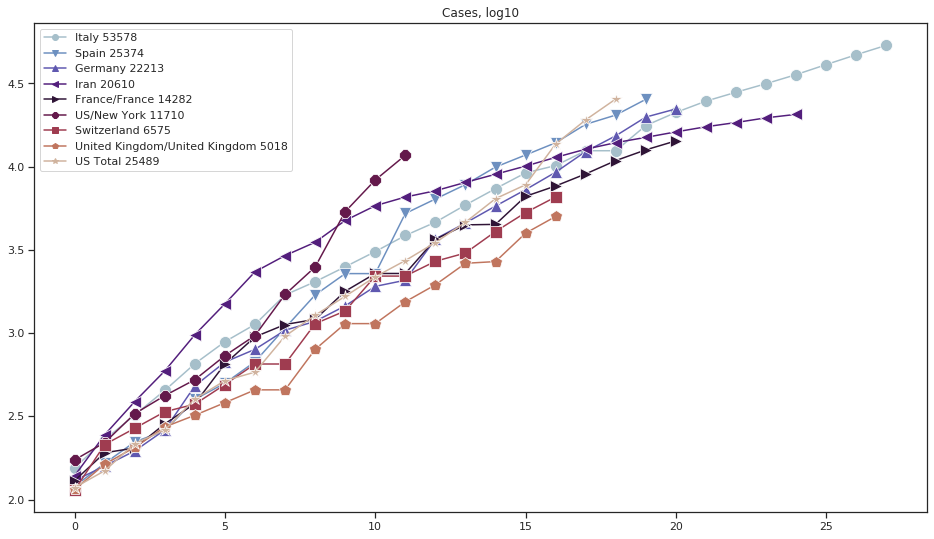

In [26]:
from math import log10
plt.figure(figsize=(16, 9))
plt.title("Cases, log10")

sns.lineplot(data = data.applymap(log10), palette="twilight", hue="label",linewidth=1.5, dashes = False,style= True, markers = filled_markers, markersize=12)

